In [1]:
# imports for this notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# standard data access code
import os
import platform
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

# Set file location based on platform. 
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/TReND2024/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/TReND2024/"

manifest_file = os.path.join(data_root,'allen-brain-observatory/visual-coding-2p/manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

#This instantiates the Brain Observatory Cache
boc = BrainObservatoryCache(manifest_file=manifest_file)

In [4]:
# have the areas
boc.get_all_targeted_structures() # The different regions of the brain 

['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']

In [5]:
visual_area = "VISp"

### The number of experiments in the VISal visual area 

In [6]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area])

In [7]:
len(exps) # the number experiments in the Visal visual area

144

### The total number of experiments that we have in the visual cortex 

In [8]:
len(boc.get_experiment_containers()) # the whole experiments 

456

In [9]:
visual_area1 = "VISal"
exps1 = boc.get_experiment_containers(targeted_structures=[visual_area1])
print(len(exps1))
visual_area2 = "VISam"
exps2 = boc.get_experiment_containers(targeted_structures=[visual_area2])
print(len(exps2))
visual_area3 = "VISl"
exps3 = boc.get_experiment_containers(targeted_structures=[visual_area3])
print(len(exps3))
visual_area4 = "VISp"
exps4 = boc.get_experiment_containers(targeted_structures=[visual_area4])
print(len(exps4))
visual_area5 = "VISpm"
exps5 = boc.get_experiment_containers(targeted_structures=[visual_area5])
print(len(exps5))
visual_area6 = "VISrl"
exps6 = boc.get_experiment_containers(targeted_structures=[visual_area6])
print(len(exps6))

41
38
106
144
87
40


In [10]:
print(len(exps1) + len(exps2) + len(exps3) + len(exps4) + len(exps5) + len(exps6))

456


In [11]:
all_depth = boc.get_all_imaging_depths()

In [12]:
print(all_depth)

[175, 185, 195, 200, 205, 225, 250, 265, 275, 276, 285, 300, 320, 325, 335, 350, 365, 375, 390, 400, 550, 570, 625]


In [13]:
main_area = "VISp"
exps = boc.get_experiment_containers(targeted_structures=[main_area])

In [14]:
data = pd.DataFrame(exps)
data.head()

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,661437138,175,VISp,Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),365251,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-365251,[],False
1,511510911,350,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),230570,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570,[],False
2,644909309,550,VISp,Ntsr1-Cre_GN220,Ai148(TIT2L-GC6f-ICL-tTA2),348105,Ntsr1-Cre_GN220;Ai148-348105,[],False
3,511510736,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],False
4,528792730,350,VISp,Nr5a1-Cre,Ai93(TITL-GCaMP6f),248894,Nr5a1-Cre;Camk2a-tTA;Ai93-248894,[],False


In [15]:
print(len(data))

144


In [16]:
data["imaging_depth"]

0      175
1      350
2      550
3      175
4      350
      ... 
139    175
140    275
141    275
142    275
143    375
Name: imaging_depth, Length: 144, dtype: int64

In [17]:
# Define the conditions for different cortical layers
conditions = [
    (data['imaging_depth'] < 250),                        # Layer 2/3
    (data['imaging_depth'] >= 250) & (data['imaging_depth'] < 350), # Layer 4
    (data['imaging_depth'] >= 350) & (data['imaging_depth'] < 500), # Layer 5
    (data['imaging_depth'] >= 500)                         # Layer 6
]

# Define the layer labels
layer_labels = ['Layer 2/3', 'Layer 4', 'Layer 5', 'Layer 6']

# Create a new column 'Cortical_Layer' using numpy select
data['Cortical_Layer'] = np.select(conditions, layer_labels)

# Display the DataFrame with the new column
data


,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed,Cortical_Layer
0,661437138,175,VISp,Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),365251,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-365251,[],False,Layer 2/3
1,511510911,350,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),230570,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570,[],False,Layer 5
2,644909309,550,VISp,Ntsr1-Cre_GN220,Ai148(TIT2L-GC6f-ICL-tTA2),348105,Ntsr1-Cre_GN220;Ai148-348105,[],False,Layer 6
3,511510736,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],False,Layer 2/3
4,528792730,350,VISp,Nr5a1-Cre,Ai93(TITL-GCaMP6f),248894,Nr5a1-Cre;Camk2a-tTA;Ai93-248894,[],False,Layer 5
...,...,...,...,...,...,...,...,...,...,...
139,511510718,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),231584,Cux2-CreERT2;Camk2a-tTA;Ai93-231584,[],False,Layer 2/3
140,511510989,275,VISp,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),222431,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-222431,[],False,Layer 4
141,527676429,275,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),237706,Emx1-IRES-Cre;Camk2a-tTA;Ai93-237706,[Epileptiform Events],False,Layer 4
142,580043437,275,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),297504,Sst-IRES-Cre;Ai148(CAM)-297504,[],False,Layer 4


In [18]:
df_layer2_3 = data[data["Cortical_Layer"] == "Layer 2/3"]

In [19]:
len(df_layer2_3)

35

In [20]:
df_layer2_3.head()

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed,Cortical_Layer
0,661437138,175,VISp,Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),365251,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-365251,[],False,Layer 2/3
3,511510736,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],False,Layer 2/3
8,670396939,195,VISp,Pvalb-IRES-Cre,Ai162(TIT2L-GC6s-ICL-tTA2),369497,Pvalb-IRES-Cre;Ai162-369497,[],False,Layer 2/3
10,511510855,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),229106,Cux2-CreERT2;Camk2a-tTA;Ai93-229106,[],False,Layer 2/3
19,682734790,205,VISp,Slc17a7-IRES2-Cre,Ai94(TITL-GCaMP6s),377111,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai94-377111,[],False,Layer 2/3


In [21]:
df_layer4 = data[data["Cortical_Layer"] == "Layer 4"]

In [22]:
df_layer4.head()

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed,Cortical_Layer
6,581026086,275,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),297507,Sst-IRES-Cre;Ai148(CAM)-297507,[],False,Layer 4
13,561312433,275,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),280638,Emx1-IRES-Cre;Camk2a-tTA;Ai93-280638,[],False,Layer 4
14,512124562,275,VISp,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),234831,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-234831,[],False,Layer 4
15,511510675,275,VISp,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),228786,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-228786,[],False,Layer 4
16,573720506,275,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),297620,Sst-IRES-Cre;Ai148(CAM)-297620,[],False,Layer 4


In [23]:
print(len(df_layer4))

53


In [24]:
df_layer5 = data[data["Cortical_Layer"] == "Layer 5"]

In [25]:
df_layer5.head()

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed,Cortical_Layer
1,511510911,350,VISp,Scnn1a-Tg3-Cre,Ai93(TITL-GCaMP6f),230570,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570,[],False,Layer 5
4,528792730,350,VISp,Nr5a1-Cre,Ai93(TITL-GCaMP6f),248894,Nr5a1-Cre;Camk2a-tTA;Ai93-248894,[],False,Layer 5
5,595263152,375,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),309152,Emx1-IRES-Cre;Camk2a-tTA;Ai93-309152,[],False,Layer 5
9,598564171,375,VISp,Rbp4-Cre_KL100,Ai93(TITL-GCaMP6f),315297,Rbp4-Cre_KL100;Camk2a-tTA;Ai93-315297,[],False,Layer 5
11,614418789,375,VISp,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),332396,Sst-IRES-Cre;Ai148(CAM)-332396,[],False,Layer 5


In [26]:
print(len(df_layer5))

50


In [27]:
df_layer6 = data[data["Cortical_Layer"] == "Layer 6"]

In [28]:
df_layer6.head()

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed,Cortical_Layer
2,644909309,550,VISp,Ntsr1-Cre_GN220,Ai148(TIT2L-GC6f-ICL-tTA2),348105,Ntsr1-Cre_GN220;Ai148-348105,[],False,Layer 6
7,603576130,550,VISp,Ntsr1-Cre_GN220,Ai148(TIT2L-GC6f-ICL-tTA2),323982,Ntsr1-Cre_GN220;Ai148-323982,[],False,Layer 6
25,603425700,550,VISp,Ntsr1-Cre_GN220,Ai148(TIT2L-GC6f-ICL-tTA2),323984,Ntsr1-Cre_GN220;Ai148-323984,[],False,Layer 6
85,627823692,550,VISp,Ntsr1-Cre_GN220,Ai148(TIT2L-GC6f-ICL-tTA2),339814,Ntsr1-Cre_GN220;Ai148-339814,[],False,Layer 6
112,686912320,550,VISp,Ntsr1-Cre_GN220,Ai148(TIT2L-GC6f-ICL-tTA2),377129,Ntsr1-Cre_GN220;Ai148-377129,[],False,Layer 6


In [29]:
print(len(df_layer6))

6


 # Session Types For The Different Layers

In [30]:
ids  = df_layer2_3["id"].values

In [31]:
print(len(ids))

35


In [32]:
sessions = boc.get_ophys_experiments(experiment_container_ids = ids)

In [33]:
print(len(sessions))

105


In [34]:
layer_23 = pd.DataFrame(sessions)
layer_23.head()

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,704298735,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),111,701412138,three_session_A,382421,Cux2-CreERT2;Camk2a-tTA;Ai93-382421,False
1,676024958,200,VISp,Pvalb-IRES-Cre,Ai162(TIT2L-GC6s-ICL-tTA2),95,674679297,three_session_C2,373762,Pvalb-IRES-Cre;Ai162-373762,False
2,545446482,175,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),99,543677425,three_session_A,260936,Emx1-IRES-Cre;Camk2a-tTA;Ai93-260936,True
3,501794235,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),107,511507650,three_session_B,222424,Cux2-CreERT2;Camk2a-tTA;Ai93-222424,True
4,605913519,175,VISp,Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),99,604866830,three_session_B,326489,Vip-IRES-Cre;Ai148-326489,True


In [35]:
print(len(layer_23))

105


# Session A -> Stimulus -> Decoding Accuracy

In [36]:
session_A = layer_23[layer_23["session_type"] == "three_session_A"]

In [37]:
session_A.head()

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,704298735,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),111,701412138,three_session_A,382421,Cux2-CreERT2;Camk2a-tTA;Ai93-382421,False
2,545446482,175,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),99,543677425,three_session_A,260936,Emx1-IRES-Cre;Camk2a-tTA;Ai93-260936,True
12,657078119,175,VISp,Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),111,657078117,three_session_A,357433,Vip-IRES-Cre;Ai148-357433,True
15,663485329,175,VISp,Slc17a7-IRES2-Cre,Ai93(TITL-GCaMP6f),102,661732156,three_session_A,365255,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93-365255,False
16,652091264,175,VISp,Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),91,652091262,three_session_A,354819,Vip-IRES-Cre;Ai148-354819,True


In [38]:
print(len(session_A))

35


In [39]:
session_ids = session_A["id"].values

In [40]:
session_ids

array([704298735, 545446482, 657078119, 663485329, 652091264, 657390171,
       510514474, 501704220, 612543999, 683257169, 502205092, 526504941,
       658518486, 661437140, 501271265, 501836392, 672206735, 688678766,
       652842572, 583279803, 653125130, 650079244, 510517131, 606353987,
       670395999, 671164733, 680156911, 540684467, 667364442, 675477919,
       692345003, 670728674, 502115959, 652094901, 657775947])

In [41]:
oneRandomSession=session_ids[0]
oneRandomSession

704298735

# Getting the data from sessions

In [42]:
dataset = [boc.get_ophys_experiment_data(ophys_experiment_id = session) for session in session_ids]

In [43]:
# Assuming session_ids contains multiple session IDs
session_ids = session_A["id"].values  # Ensure session_A is a DataFrame or similar structure
# Fetch data for each session and process it
dataset = boc.get_ophys_experiment_data(ophys_experiment_id=session_ids[17])
stim_table = dataset.get_stimulus_table("drifting_gratings")

In [44]:
session_ids[17]

688678766

# Stimulus table of that session 

In [45]:
stim_table.head(n=10)

,temporal_frequency,orientation,blank_sweep,start,end
0,4.0,45.0,0.0,736,796
1,15.0,180.0,0.0,826,886
2,2.0,0.0,0.0,917,977
3,15.0,180.0,0.0,1007,1067
4,8.0,0.0,0.0,1098,1158
5,2.0,225.0,0.0,1188,1248
6,2.0,270.0,0.0,1279,1339
7,1.0,180.0,0.0,1369,1429
8,4.0,135.0,0.0,1460,1520
9,1.0,180.0,0.0,1550,1610


In [46]:
print(len(stim_table))

628


In [47]:
import numpy as np
orivals = stim_table.orientation.dropna().unique()
print("orientations: ", np.sort(orivals))
tfvals = stim_table.temporal_frequency.dropna().unique()
print("temporal frequencies: ", np.sort(tfvals))

orientations:  [  0.  45.  90. 135. 180. 225. 270. 315.]
temporal frequencies:  [ 1.  2.  4.  8. 15.]


In [48]:
len(stim_table[np.isnan(stim_table.orientation)])

30

In [49]:
# import pandas as pd

# # Assuming session_ids contains multiple session IDs
# session_ids = session_A["id"].values  # Ensure session_A is a DataFrame or similar structure

# # Initialize an empty list to store each session's stimulus table
# all_stim_tables = []

# # Fetch data for each session and append the stimulus table to the list
# for session_id in session_ids:
#     try:
#         dataset = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)
#         stim_table = dataset.get_stimulus_table("drifting_gratings")
#         all_stim_tables.append(stim_table)  # Append the table to the list
#     except AttributeError as e:
#         print(f"Failed to process session {session_id}: {e}")

# # Concatenate all tables into one DataFrame
# all_stimulus_data = pd.concat(all_stim_tables, ignore_index=True)

# # Now all_stimulus_data contains the combined stimulus tables from all sessions
# # print(all_stimulus_data)
# data_layer_23 = pd.DataFrame(all_stimulus_data)


## Maximum Projection

In [50]:
max_projection = dataset.get_max_projection()

(-0.5, 511.5, 511.5, -0.5)

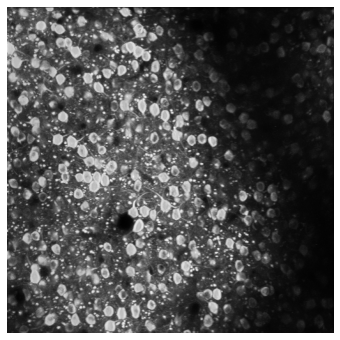

In [51]:
fig = plt.figure(figsize = (6,6))
plt.imshow(max_projection, cmap = 'gray')
plt.axis("off")

In [52]:
# # drop the blank sweeps here, we won't be using them 
# data_layer_23 = data_layer_23.drop(["blank_sweep"], axis =1)
# data_layer_23.head()

In [53]:
timestamps, dff = dataset.get_dff_traces()
stim_table = stim_table[stim_table['blank_sweep']==False]
all_cells_index = range(dff.shape[0])
mean_sweep_response = pd.DataFrame(index=stim_table.index, columns=all_cells_index, dtype=float)
# you'll need to loop over trials, but try not to loop over cells!

for trial in stim_table.index:
    mean_sweep_response.loc[trial, :] = dff[
            :, stim_table.loc[trial, "start"] : stim_table.loc[trial, "end"]
        ].mean(axis=1)

In [54]:
# Normalize the responses
# Tip: this is easier to do with a numpy array

norm_responses = mean_sweep_response.values
norm_responses = (norm_responses 
    - norm_responses.mean(axis=1, keepdims=True)) / norm_responses.std(axis=1, keepdims=True)

In [55]:
# Use the information in the stimulus table to select a subset of responses at a particular temporal frequency

# selected_sweeps = (stim_table['temporal_frequency'])
selected_responses = norm_responses[:]

# Cell ids and indices

Neuron in the session

In [56]:
cell_ids = dataset.get_cell_specimen_ids()
cell_ids

array([701728881, 701727459, 701728764, 701727473, 701733802, 701728841,
       701723075, 701721074, 701728857, 701724624, 701730908, 701723083,
       701722990, 701723010, 701724701, 701723046, 701723119, 701719950,
       701722635, 701723979, 701733395, 701723897, 701733412, 701723938,
       701733567, 701733558, 701731618, 701731639, 701731654, 701731668,
       701731595, 701720162, 701722309, 701728087, 701731070, 701731042,
       701728318, 701731027, 701723174, 701731388, 701722602, 701722651,
       701727522, 701732039, 701731971, 701727263, 701719649, 701722905,
       701719661, 701727499, 701719670, 701722893, 701719848, 701731990,
       701719869, 701719876, 701719862, 701719841, 701726601, 701719962,
       701719976, 701719983, 701719943, 701719936, 701719811, 701721280,
       701729645, 701724099, 701721432, 701727408, 701724192, 701729731,
       701726085, 701720301, 701720266, 701732748, 701720308, 701729586,
       701720833, 701721221, 701733732, 701720827, 

In [57]:
print(len(cell_ids))

475


In [58]:
import pandas as pd

# Assuming session_ids contains multiple session IDs
session_ids = [704298735, 545446482, 657078119, 663485329, 652091264, 657390171,
       510514474, 501704220, 612543999, 683257169, 502205092, 526504941,
       658518486, 661437140, 501271265, 501836392, 672206735, 688678766,
       652842572, 583279803, 653125130, 650079244, 510517131, 606353987,
       670395999, 671164733, 680156911, 540684467, 667364442, 675477919,
       692345003, 670728674, 502115959, 652094901, 657775947] 

cell_counts = []

for session_id in session_ids:
    # Fetch data for each session
    dataset = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)
    cell_ids = dataset.get_cell_specimen_ids()
    
    # Append the count of cells for each session
    cell_counts.append({'session_id': session_id, 'cell_count': len(cell_ids)})

# Create a DataFrame from the collected data
df = pd.DataFrame(cell_counts)

print(df)

    session_id  cell_count
0    704298735          95
1    545446482         171
2    657078119           9
3    663485329         107
4    652091264          17
5    657390171           9
6    510514474         226
7    501704220         142
8    612543999          13
9    683257169         296
10   502205092         292
11   526504941         167
12   658518486          12
13   661437140          86
14   501271265         215
15   501836392         178
16   672206735           9
17   688678766         475
18   652842572         244
19   583279803          11
20   653125130         224
21   650079244          24
22   510517131         266
23   606353987          13
24   670395999           3
25   671164733          32
26   680156911         337
27   540684467         290
28   667364442          87
29   675477919          10
30   692345003           7
31   670728674          18
32   502115959         205
33   652094901         207
34   657775947           8


In [59]:
print(len(cell_ids))

8


In [60]:
cell_index = dataset.get_cell_specimen_indices(cell_ids)
print(cell_index)

[0, 1, 2, 3, 4, 5, 6, 7]


# Session Metadata

In [61]:
md = dataset.get_metadata()
md

{'sex': 'female',
 'targeted_structure': 'VISp',
 'ophys_experiment_id': 657775947,
 'experiment_container_id': 657775945,
 'excitation_lambda': '910 nanometers',
 'indicator': 'GCaMP6f',
 'fov': '400x400 microns (512 x 512 pixels)',
 'genotype': 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'session_start_time': datetime.datetime(2018, 1, 18, 8, 30, 20),
 'session_type': 'three_session_A',
 'specimen_name': 'Vip-IRES-Cre;Ai148-355670',
 'cre_line': 'Vip-IRES-Cre/wt',
 'imaging_depth_um': 175,
 'age_days': 130,
 'device': 'Nikon A1R-MP multiphoton microscope',
 'device_name': 'CAM2P.1',
 'pipeline_version': '3.0'}

# Population Decoding 

In [62]:
  # Create a target variable y that is 1 when the orientation is 45 degrees and 0 otherwise
  #target_orientation = 90
 # y = (stim_table.loc[selected_sweeps, 'orientation'] == target_orientation).astype(int)

  # and set X to the response of the first cell from above, making sure it has shape (n_trials, 1)
  X = selected_responses[:,cell_index]

In [63]:
print(X.shape)

(598, 8)


In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(stim_table.loc[:, 'orientation'])
print(y.shape)

(598,)


In [65]:
print(y)

[1 4 0 4 0 5 6 4 3 4 3 3 3 4 0 6 7 6 7 2 1 7 0 4 4 6 2 1 7 2 1 1 3 2 2 1 4
 7 4 3 3 3 5 5 2 5 3 3 2 3 0 2 3 2 2 6 6 2 6 5 4 6 6 6 1 0 5 0 6 0 2 4 3 2
 4 7 1 3 3 2 6 0 4 3 0 5 7 4 2 3 3 7 0 3 3 2 5 3 1 1 5 5 2 0 6 4 3 5 3 7 7
 0 5 3 6 2 1 5 5 0 6 2 6 4 1 1 1 4 3 4 7 1 1 3 0 4 1 4 7 2 5 6 6 5 3 0 5 7
 4 2 5 5 4 7 7 3 1 5 4 4 0 0 4 4 7 0 5 2 1 6 4 7 7 3 6 4 3 3 2 3 0 0 6 0 3
 6 7 4 7 5 2 1 0 2 6 1 0 7 6 6 4 5 2 6 2 3 7 6 4 6 1 1 4 0 6 7 2 1 6 7 5 2
 2 1 3 5 3 2 2 3 6 3 0 5 3 4 2 0 1 2 7 1 4 6 7 2 5 6 0 0 1 7 3 1 5 0 6 6 5
 1 0 7 3 0 0 3 5 6 5 6 7 6 6 1 3 1 2 5 3 3 7 1 0 5 4 7 3 5 4 5 0 7 7 7 6 4
 4 5 6 7 0 2 2 7 0 6 3 5 3 3 1 0 1 5 0 1 0 6 0 4 1 2 3 5 6 7 3 6 5 1 5 6 7
 7 3 5 1 3 5 2 6 1 4 3 2 2 6 6 4 1 7 7 2 3 1 2 6 6 1 2 3 1 4 2 1 1 4 1 0 5
 4 1 7 7 1 4 5 0 4 1 1 4 0 3 5 6 3 5 1 2 0 5 7 5 2 2 7 2 2 0 7 7 0 5 0 1 7
 0 6 7 5 7 0 6 4 6 0 6 5 7 0 4 6 2 2 0 3 6 1 2 2 0 7 6 6 7 2 2 6 1 7 3 4 5
 1 0 5 7 0 6 2 0 5 2 1 4 2 4 5 6 4 7 5 4 0 2 2 4 7 7 5 4 1 1 1 7 5 3 0 5 4
 2 7 6 3 1 4 4 7 0 2 2 6 

In [66]:
print(len(X))

598


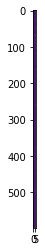

In [67]:
import matplotlib.pyplot as plt 
plt.imshow(X)

In [68]:
print(X.shape)
print(y.shape)

(598, 8)
(598,)


In [69]:
print(X.mean())

-0.05788070689419297


# Checking the number of Orientation across neurons 

In [70]:
print(len(y))

598


In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
model = SVC()

# this introduces randomness, so set the random 'seed' for reproducibility
np.random.seed(4)
# stratify=y ensures that the train and test sets have the same proportion of each class
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)


# the accuracy for all of the cells
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.29333333333333333

In [72]:
print(len(X_test))

150


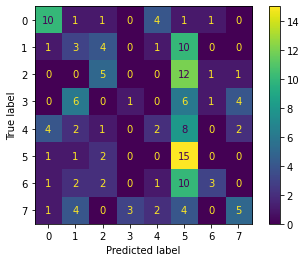

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

cn_display = ConfusionMatrixDisplay.from_estimator(model, X_test,y_test)

# Number of sessions and Cells across Layers

In [74]:
#### Layer 2/3

In [75]:
session_ids_layer23 = session_A["id"].values
print(len(session_ids_layer23))

35


In [76]:
total_neurons = 0
for session_id in session_ids_layer23: 
        total_neurons += len(dataset.get_cell_specimen_ids())  # Track the total number of neurons
print(total_neurons)

280


In [77]:
# Layer 4

In [78]:
session_ids_4 = session_A_4["id"].values
print(len(session_ids_4))

NameError: name 'session_A_4' is not defined

In [ ]:
total_neurons = 0
for session_id in session_ids_4: 
        total_neurons += len(dataset.get_cell_specimen_ids())  # Track the total number of neurons
print(total_neurons)

In [ ]:
## Layer 5

In [ ]:
session_ids_5 = session_A_5["id"].values
print(len(session_ids_5))

In [ ]:
total_neurons = 0
for session_id in session_ids_5: 
        total_neurons += len(dataset.get_cell_specimen_ids())  # Track the total number of neurons
print(total_neurons)

In [ ]:
### Layer 6

In [ ]:
session_ids_6 = session_A_6["id"].values
print(len(session_ids_6))

In [ ]:
total_neurons = 0
for session_id in session_ids_6: 
        total_neurons += len(dataset.get_cell_specimen_ids())  # Track the total number of neurons
print(total_neurons)

# Trying population decoding across different Sessions

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder


# Function to get mean response  for a session
def norm_sweep_response(sessionId):
    '''- This function takes in a session id,
     - retrieves the stimulus table,
     - computes the mean response.
     - normalizes the mean response
     -  select a subset of norm_responses at a particular temporal frequency and returns it.

    '''
    dataset = boc.get_ophys_experiment_data(ophys_experiment_id=sessionId)
    stim_table = dataset.get_stimulus_table("drifting_gratings")
    orivals = stim_table.orientation.dropna().unique()  
    tfvals = stim_table.temporal_frequency.dropna().unique()

    
    timestamps, dff = dataset.get_dff_traces()
    stim_table = stim_table[stim_table['blank_sweep']==False]
    all_cells_index = range(dff.shape[0])
    mean_sweep_response = pd.DataFrame(index=stim_table.index, columns=all_cells_index, dtype=float)
    # you'll need to loop over trials, but try not to loop over cells!

    for trial in stim_table.index:
        mean_sweep_response.loc[trial, :] = dff[
            :, stim_table.loc[trial, "start"] : stim_table.loc[trial, "end"]
        ].mean(axis=1)
    

    # Normalize the responses

    norm_responses = mean_sweep_response.values
    norm_responses = (norm_responses - norm_responses.mean(axis=1, keepdims=True)) / norm_responses.std(axis=1, keepdims=True)

    #selected_sweeps = (stim_table['temporal_frequency'] == 2.0)
    selected_responses = norm_responses[:]

    # get cell Indice
    cell_ids = dataset.get_cell_specimen_ids()
    cells_index = dataset.get_cell_specimen_indices(cell_ids)

    # First define X and y

    # Create a target variable y that is 1 when the orientation is 45 degrees and 0 otherwise
    #target_orientation = 45
    #y = (stim_table.loc[selected_sweeps, 'orientation'] == target_orientation).astype(int)

    # and set X to the response of the first cell from above, making sure it has shape (n_trials, 1)
    X = selected_responses[:,cells_index]

    le = LabelEncoder()
    y = le.fit_transform(stim_table.loc[:, 'orientation'])
    # print(X.mean())

    return X, y

In [ ]:
from typing import Text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
class_names = ['1', '2', '3', '4', '5', '6', '7', '8']
from sklearn.svm import SVC

# this introduces randomness, so set the random 'seed' for reproducibility
np.random.seed(4)
# stratify=y ensures that the train and test sets have the same proportion of each class
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)


# # the accuracy for all of the cells
# model.fit(X_train,y_train)
# model.score(X_test,y_test)

def make_predictions(X, y):
    np.random.seed(8)
    # stratify=y ensures that the train and test sets have the same proportion of each class
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

    model = SVC()
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    accuracy_ = model.score(X_test, y_test)
    plt.figure()
    ConfusionMatrixDisplay.from_estimator(model, X_test,y_test)

    return accuracy_, confusion_matrix(y_test, y_pred, normalize='all')


In [ ]:
import seaborn as sns

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Average Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def evaluate_sessions(session_ids):
    all_accuracies = []
    all_conf_matrices = []

    # Step 1: Count the number of cells in each session
    cell_counts = []
    for session_id in session_ids:
        dataset = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)
        cell_ids = dataset.get_cell_specimen_ids()
        cell_counts.append({'session_id': session_id, 'cell_count': len(cell_ids)})

    df = pd.DataFrame(cell_counts)
    
    # Step 2: Filter out sessions with fewer than 50 cells
    filtered_session_ids = df[df['cell_count'] > 100]['session_id'].tolist()

    for session_id in filtered_session_ids: 
        X, y = norm_sweep_response(session_id)
        total_neurons += len(dataset.get_cell_specimen_ids())  # Track the total number of neurons
        accuracy, conf_matrix = make_predictions(X, y)
        all_accuracies.append(accuracy)
        all_conf_matrices.append(conf_matrix)

    avg_accuracy = sum(all_accuracies) / len(all_accuracies)
    avg_confusion_matrix = np.mean(all_conf_matrices, axis=0)

    return avg_accuracy, avg_confusion_matrix, total_neurons

In [ ]:
# Example usage
session_ids = [704298735, 545446482, 657078119, 663485329, 652091264, 657390171,
       510514474, 501704220, 612543999, 683257169, 502205092, 526504941,
       658518486, 661437140, 501271265, 501836392, 672206735, 688678766,
       652842572, 583279803, 653125130, 650079244, 510517131, 606353987,
       670395999, 671164733, 680156911, 540684467, 667364442, 675477919,
       692345003, 670728674, 502115959, 652094901, 657775947]
avg_accuracy, avg_conf_matrix = evaluate_sessions(session_ids)

print(f"Average Accuracy: {avg_accuracy}")
plot_confusion_matrix(avg_conf_matrix, class_names)

In [ ]:
evaluate_sessions([688678766])

# For all of the layers

# Layer 2/3

In [ ]:
avg_acc_l23, avg_conf_mat_l23, _, l23_acc = evaluate_sessions(session_ids)
print(avg_acc_l23)
plot_confusion_matrix(avg_conf_mat_l23, class_names)

# Layer 4

In [ ]:
ids_4  = df_layer4["id"].values

In [ ]:
sessions_4 = boc.get_ophys_experiments(experiment_container_ids = ids_4)

In [ ]:
layer_4 = pd.DataFrame(sessions_4)
layer_4.head()

In [ ]:
session_A_4 = layer_4[layer_4["session_type"] == "three_session_A"]  

In [ ]:
session_A_4.head()

In [ ]:
session_ids_4 = session_A_4["id"].values

In [ ]:
session_ids_4

In [ ]:
avg_acc_l4, avg_conf_mat_l4 = evaluate_sessions(session_ids_4)
print(avg_acc_l4)
plot_confusion_matrix(avg_conf_mat_l4, class_names)

# Layer 5

In [ ]:
ids_6  = df_layer5["id"].values

In [ ]:
sessions_5 = boc.get_ophys_experiments(experiment_container_ids = ids_6)

In [ ]:
layer_5 = pd.DataFrame(sessions_5)
layer_5.head()

In [ ]:
session_A_5 = layer_5[layer_5["session_type"] == "three_session_A"]  

In [ ]:
session_A_5.head()

In [ ]:
session_ids_5 = session_A_5["id"].values

In [ ]:
session_ids_5

In [ ]:
avg_acc_l5, avg_conf_mat_l5 = evaluate_sessions(session_ids_5)
print(avg_acc_l5)
plot_confusion_matrix(avg_conf_mat_l5, class_names)

# Layer 6 

In [ ]:
ids_6  = df_layer6["id"].values

In [ ]:
sessions_6 = boc.get_ophys_experiments(experiment_container_ids = ids_6)

In [ ]:
layer_6 = pd.DataFrame(sessions_6)
layer_6.head()

In [ ]:
session_A_6 = layer_6[layer_6["session_type"] == "three_session_A"]

In [ ]:
session_A_6.head()

In [ ]:
session_ids_6 = session_A_6["id"].values

In [ ]:
session_ids_6

In [ ]:
avg_acc_l6, avg_conf_mat_l6 = evaluate_sessions(session_ids_6)
print(avg_acc_l6)
plot_confusion_matrix(avg_conf_mat_l6, class_names)

session_ids_layer23# Neuron Significance Across Specialized Layer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming boc is already defined

def norm_sweep_response(sessionId):
    dataset = boc.get_ophys_experiment_data(ophys_experiment_id=sessionId)
    stim_table = dataset.get_stimulus_table("drifting_gratings")
    stim_table = stim_table[stim_table['blank_sweep'] == False]  # Filter out blank sweeps

    timestamps, dff = dataset.get_dff_traces()
    mean_sweep_response = pd.DataFrame(index=stim_table.index, columns=range(dff.shape[0]), dtype=float)

    for trial in stim_table.index:
        start, end = stim_table.loc[trial, ['start', 'end']]
        mean_sweep_response.loc[trial, :] = dff[:, start:end].mean(axis=1)

    # Normalize responses
    norm_responses = (mean_sweep_response - mean_sweep_response.mean()) / mean_sweep_response.std()
    X = norm_responses.values

    le = LabelEncoder()
    y = le.fit_transform(stim_table['orientation'])

    return X, y, mean_sweep_response.columns

def feature_importance(X, y):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    importances = model.feature_importances_

    return importances

def plot_feature_importance(importances, neuron_ids):
    sns.barplot(x=neuron_ids, y=importances, palette='viridis')
    plt.title('Feature Importance in Neural Encoding')
    plt.xlabel('Neuron ID')
    plt.ylabel('Importance')
    plt.show()

def evaluate_sessions(session_ids):
    session_importances = []

    for session_id in session_ids:
        X, y, neuron_ids = norm_sweep_response(session_id)
        importances = feature_importance(X, y)
        session_importances.append(importances)

        # Optionally visualize the importance for each session
        plot_feature_importance(importances, neuron_ids)

    # Aggregate feature importance across sessions
    avg_importance = np.mean(session_importances, axis=0)
    plot_feature_importance(avg_importance, neuron_ids)

    return avg_importance

# Example usage
session_ids = [...]  # List your session IDs
avg_importance = evaluate_sessions(session_ids)


# Subsample the neuron sizes 

In [ ]:
import random
def norm_sweep_response(sessionId, num_neurons=None):
    dataset = boc.get_ophys_experiment_data(ophys_experiment_id=sessionId)
    stim_table = dataset.get_stimulus_table("drifting_gratings")
    stim_table = stim_table[stim_table['blank_sweep'] == False]

    timestamps, dff = dataset.get_dff_traces()
    cell_ids = dataset.get_cell_specimen_ids()
    if num_neurons is not None and num_neurons < len(cell_ids):
        selected_cells = random.sample(list(cell_ids), num_neurons)
        cells_index = dataset.get_cell_specimen_indices(selected_cells)
    else:
        cells_index = range(dff.shape[0])

    mean_sweep_response = pd.DataFrame(index=stim_table.index, columns=cells_index, dtype=float)

    for trial in stim_table.index:
        start = stim_table.loc[trial, "start"]
        end = stim_table.loc[trial, "end"]
        mean_sweep_response.loc[trial, :] = dff[cells_index, start:end].mean(axis=1)

    norm_responses = mean_sweep_response.values
    norm_responses = (norm_responses - norm_responses.mean(axis=1, keepdims=True)) / norm_responses.std(axis=1, keepdims=True)
    
    X = norm_responses
    le = LabelEncoder()
    y = le.fit_transform(stim_table.loc[:, 'orientation'])

    return X, y

def evaluate_sessions(session_ids, neuron_sample_sizes):
    all_accuracies = {n: [] for n in neuron_sample_sizes}
    all_conf_matrices = {n: [] for n in neuron_sample_sizes}

    for session_id in session_ids:
        dataset = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)
        cell_count = len(dataset.get_cell_specimen_ids())

        for n in neuron_sample_sizes:
            if n <= cell_count:  # Ensure there are enough cells to sample
                X, y = norm_sweep_response(session_id, num_neurons=n)
                accuracy, conf_matrix = make_predictions(X, y)
                all_accuracies[n].append(accuracy)
                all_conf_matrices[n].append(conf_matrix)

    # Calculate average accuracy and confusion matrix for each neuron sample size
    avg_accuracies = {n: np.mean(all_accuracies[n]) for n in neuron_sample_sizes}
    avg_conf_matrices = {n: np.mean(all_conf_matrices[n], axis=0) for n in neuron_sample_sizes}

    return avg_accuracies, avg_conf_matrices

# Neuron sample sizes to test
neuron_sample_sizes = [10, 20, 30, 50, 100]

# Calculate decoding performances
avg_accuracies, avg_conf_matrices = evaluate_sessions(session_ids, neuron_sample_sizes)

class_names = ['1', '2', '3', '4', '5', '6', '7', '8']
# Display results
for n in neuron_sample_sizes:
    print(f"Average Accuracy with {n} neurons: {avg_accuracies[n]}")
    plot_confusion_matrix(avg_conf_matrices[n], class_names)  # Assuming class_names are defined


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming boc and all necessary imports are already defined

def norm_sweep_response(sessionId):
    dataset = boc.get_ophys_experiment_data(ophys_experiment_id=sessionId)
    stim_table = dataset.get_stimulus_table("drifting_gratings")
    stim_table = stim_table[stim_table['blank_sweep'] == False]

    timestamps, dff = dataset.get_dff_traces()
    mean_sweep_response = pd.DataFrame(index=stim_table.index, columns=range(dff.shape[0]), dtype=float)

    for trial in stim_table.index:
        start = stim_table.loc[trial, "start"]
        end = stim_table.loc[trial, "end"]
        mean_sweep_response.loc[trial, :] = dff[:, start:end].mean(axis=1)

    norm_responses = (mean_sweep_response - mean_sweep_response.mean()) / mean_sweep_response.std()
    X = norm_responses.values

    le = LabelEncoder()
    y = le.fit_transform(stim_table['orientation'])

    return X, y

def feature_importance(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    return model, importances

def evaluate_sessions(session_ids):
    all_accuracies = []
    all_importances = []

    for session_id in session_ids:
        dataset = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)
        if len(dataset.get_cell_specimen_ids()) >= 50:
            X, y = norm_sweep_response(session_id)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
            model, importances = feature_importance(X_train, y_train)
            accuracy = model.score(X_test, y_test)
            all_accuracies.append(accuracy)
            all_importances.append(importances)

    avg_accuracy = np.mean(all_accuracies)
    avg_importances = np.mean(all_importances, axis=0)
    return avg_accuracy, avg_importances

def plot_feature_importance(importances):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=np.arange(len(importances)), y=importances, palette='viridis')
    plt.title('Feature Importance in Neural Encoding')
    plt.xlabel('Neuron ID')
    plt.ylabel('Importance')
    plt.show()

# List your session IDs
session_ids = session_A["id"].values # abbreviated for brevity
avg_accuracy, avg_importances = evaluate_sessions(session_ids)
print(f"Average Accuracy: {avg_accuracy}")
plot_feature_importance(avg_importances)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

def norm_sweep_response(sessionId):
    dataset = boc.get_ophys_experiment_data(ophys_experiment_id=sessionId)
    stim_table = dataset.get_stimulus_table("drifting_gratings")
    stim_table = stim_table[stim_table['blank_sweep'] == False]
    timestamps, dff = dataset.get_dff_traces()
    cell_ids = dataset.get_cell_specimen_ids()
    cells_index = range(dff.shape[0])

    mean_sweep_response = pd.DataFrame(index=stim_table.index, columns=cells_index, dtype=float)
    for trial in stim_table.index:
        start = stim_table.loc[trial, "start"]
        end = stim_table.loc[trial, "end"]
        mean_sweep_response.loc[trial, :] = dff[:, start:end].mean(axis=1)

    norm_responses = (mean_sweep_response.values - mean_sweep_response.values.mean(axis=1, keepdims=True)) / mean_sweep_response.values.std(axis=1, keepdims=True)
    X = norm_responses
    y = LabelEncoder().fit_transform(stim_table['orientation'])

    return X, y, cell_ids

def feature_importance(X, y):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    importances = model.feature_importances_
    return model, importances

# def evaluate_sessions(session_ids, top_n_neurons=5):
#     important_neurons = {}

#     for session_id in session_ids:
#         X, y, cell_ids = norm_sweep_response(session_id)
#         model, importances = feature_importance(X, y)
#         top_neurons_indices = np.argsort(importances)[-top_n_neurons:]
#         important_neurons[session_id] = [cell_ids[index] for index in top_neurons_indices]

#     return important_neurons

def plot_neuron_importances_all(importances, cell_ids, session_id):
    """Plot the importance of all neurons for a given session."""
    plt.figure(figsize=(15, 5))
    indices = np.argsort(importances)
    sorted_importances = importances[indices]
    sorted_cell_ids = [cell_ids[idx] for idx in indices]

    plt.bar(range(len(importances)), sorted_importances, color='lightblue')
    plt.xlabel('Neurons')
    plt.ylabel('Importance')
    plt.title(f'Feature Importances of All Neurons in Session {session_id}')
    plt.show()

def plot_top_neurons(importances, cell_ids, session_id, top_n=10):
    """Plot the top N important neurons for a given session."""
    plt.figure(figsize=(10, 5))
    indices = np.argsort(importances)[-top_n:]
    top_importances = importances[indices]
    top_cell_ids = [cell_ids[idx] for idx in indices]

    sns.barplot(x=top_cell_ids, y=top_importances, palette='viridis')
    plt.xlabel('Neuron ID')
    plt.ylabel('Importance')
    plt.title(f'Top {top_n} Important Neurons in Session {session_id}')
    plt.show()

def evaluate_and_plot(session_id, top_n_neurons=10):
    X, y, cell_ids = norm_sweep_response(session_id)
    model, importances = feature_importance(X, y)

    # Plot all neurons
    plot_neuron_importances_all(importances, cell_ids, session_id)
    
    # Plot top N neurons
    plot_top_neurons(importances, cell_ids, session_id, top_n=top_n_neurons)

# Choose a specific session ID to plot
specific_session_id = 704298735
evaluate_and_plot(specific_session_id, top_n_neurons=10)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder


# Function to get mean response  for a session
def norm_sweep_response(sessionId):
    '''- This function takes in a session id,
     - retrieves the stimulus table,
     - computes the mean response.
     - normalizes the mean response
     -  select a subset of norm_responses at a particular temporal frequency and returns it.

    '''
    dataset = boc.get_ophys_experiment_data(ophys_experiment_id=sessionId)
    stim_table = dataset.get_stimulus_table("drifting_gratings")
    orivals = stim_table.orientation.dropna().unique()  
    tfvals = stim_table.temporal_frequency.dropna().unique()

    
    timestamps, dff = dataset.get_dff_traces()
    stim_table = stim_table[stim_table['blank_sweep']==False]
    all_cells_index = range(dff.shape[0])
    mean_sweep_response = pd.DataFrame(index=stim_table.index, columns=all_cells_index, dtype=float)
    # you'll need to loop over trials, but try not to loop over cells!

    for trial in stim_table.index:
        mean_sweep_response.loc[trial, :] = dff[
            :, stim_table.loc[trial, "start"] : stim_table.loc[trial, "end"]
        ].mean(axis=1)
    

    # Normalize the responses

    norm_responses = mean_sweep_response.values
    norm_responses = (norm_responses - norm_responses.mean(axis=1, keepdims=True)) / norm_responses.std(axis=1, keepdims=True)

    #selected_sweeps = (stim_table['temporal_frequency'] == 2.0)
    selected_responses = norm_responses[:]

    # get cell Indice
    cell_ids = dataset.get_cell_specimen_ids()
    cells_index = dataset.get_cell_specimen_indices(cell_ids)

    # First define X and y

    # Create a target variable y that is 1 when the orientation is 45 degrees and 0 otherwise
    #target_orientation = 45
    #y = (stim_table.loc[selected_sweeps, 'orientation'] == target_orientation).astype(int)

    # and set X to the response of the first cell from above, making sure it has shape (n_trials, 1)
    X = selected_responses[:,cells_index]

    le = LabelEncoder()
    y = le.fit_transform(stim_table.loc[:, 'orientation'])
    # print(X.mean())

    return X, y, mean_sweep_response.columns

def feature_importance(X, y):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    importances = model.feature_importances_

    return importances

def plot_feature_importance(importances, neuron_ids):
    sns.barplot(x=neuron_ids, y=importances, palette='viridis', legend=False )
    plt.title('Feature Importance in Neural Encoding')
    plt.xlabel('Neuron ID')
    plt.ylabel('Importance')
    plt.show()

def evaluate_sessions(session_ids):
    session_importances = []

    for session_id in session_ids:
        X, y, neuron_ids = norm_sweep_response(session_id)
        importances = feature_importance(X, y)
        session_importances.append(importances)

        # Optionally visualize the importance for each session
        plot_feature_importance(importances, neuron_ids)


    return avg_importance

# Example usage
session_ids = [704298735, 545446482, 657078119, 663485329, 652091264, 657390171,
       510514474, 501704220, 612543999, 683257169, 502205092, 526504941,
       658518486, 661437140, 501271265, 501836392, 672206735, 688678766,
       652842572, 583279803, 653125130, 650079244, 510517131, 606353987,
       670395999, 671164733, 680156911, 540684467, 667364442, 675477919,
       692345003, 670728674, 502115959, 652094901, 657775947] # List your session IDs
avg_importance = evaluate_sessions(session_ids)
